In [1]:
#1. Perform exploratory data analysis and specify your findings with respect to any trends or outliers based on raw or efficiency metrics
#2. Identify correlation in performance of the ads by time metrics if any (Ex: day of the week, day etc.)
#3. Given the past performance data, predict the performance (Impressions, Clicks, Conversions, Revenue) of an ad between March 1st and March 15th.

In [4]:
# DATA ANALYSIS PHASE: main aim is to understand more about the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Display all columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [6]:
dataset=pd.read_csv('data.csv')
# shape of dataset with rows and columns
print(dataset.shape)

(4571, 9)


In [8]:
# prints top 5 records
dataset.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71


In [9]:
#1. missing values
#2. all numerical values
#3. distribution of numerical values
#4. categorical values
#5. cardinality of categorical variables
#6. outliers

# Missing Values

In [19]:
# checking the % of nan values present in each feature 
#1. creating a list of features which has missing values
features_with_nan=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
print('Features with NaN values',features_with_nan)
#2. print the feature name and % of missing values
for feature in features_with_nan:
    print(feature,np.round(dataset[feature].isnull().mean(),4),' percentage of missing values')

Features with NaN values []


# Numerical Variables

In [23]:
# list of numerical variables
numerical_features=[feature for feature in dataset.columns if dataset[feature].dtypes!='O'] # O: object(string)
print('Number of numerical variables: ',len(numerical_features))
dataset[numerical_features].head()

Number of numerical variables:  5


,impressions,clicks,cost,conversions,revenue
0,24,6,0.08,0,0.00
1,1,0,0.00,0,0.00
2,13,4,0.04,0,0.00
3,5,4,0.08,0,0.00
4,247,126,1.29,4,925.71


In [24]:
# list of variables that contain year information in numerical feature
year_feature=[feature for feature in numerical_features if 'date' in feature]
year_feature

[]

In [43]:
#Numerical variables: Continous and Discrete variables
#continous_feature(not categorical feature)
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<2]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


In [44]:
discrete_feature

[]

# Continuous Variable

In [45]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature count {}".format(len(continuous_feature)))

Continuous feature count 5


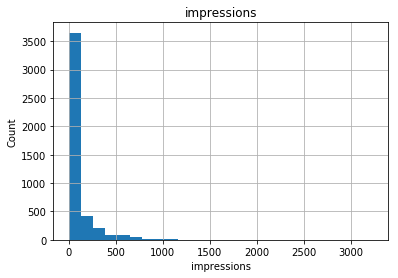

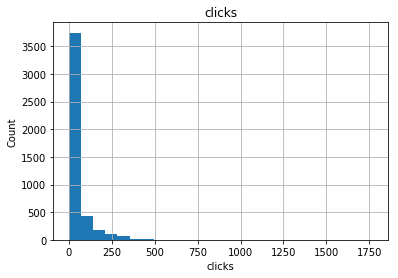

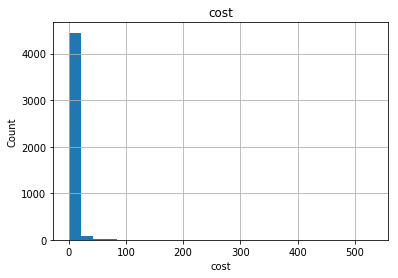

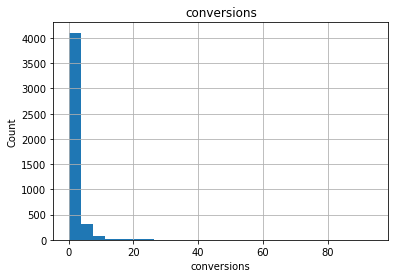

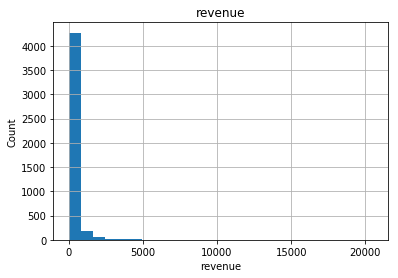

In [46]:
# analysis of continuous values by creating histograms
for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

# Outliers

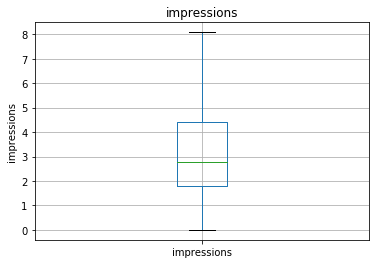

In [48]:
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

# Categorical Variables

In [49]:
data=dataset.copy()
categorical_features=[feature for feature in dataset.columns if data[feature].dtype=='O']
categorical_features

['date', 'campaign', 'adgroup', 'ad']

In [50]:
dataset[categorical_features].head()

,date,campaign,adgroup,ad
0,01-08-2020,campaign 1,adgroup 1,ad 1
1,01-08-2020,campaign 1,adgroup 2,ad 1
2,01-08-2020,campaign 1,adgroup 3,ad 1
3,01-08-2020,campaign 1,adgroup 4,ad 1
4,01-08-2020,campaign 1,adgroup 1,ad 2


In [51]:
# unique categories in each categorical feature
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is date and number of categories are 212
The feature is campaign and number of categories are 1
The feature is adgroup and number of categories are 4
The feature is ad and number of categories are 70


# Calculating Efficiency Matrices

In [55]:
# CTR - Clicks / Impression (higher the better - used to evaluate if the users find the ad relevant)
# CPC - Cost / Click (lower the better - used to evaluate if the cost for getting a click)
# CPA - Cost / Conversion (lower the better - used to evaluate if the cost for getting a conversion)
# ROI - Revenue/Cost (higher the better - used to evaluate the effectiveness of the advertising budget spent)

In [71]:
l=[]
df=pd.DataFrame(dataset)
l=df.sum(axis=0)
l

date           01-08-202001-08-202001-08-202001-08-202001-08-...
campaign       campaign 1campaign 1campaign 1campaign 1campai...
adgroup        adgroup 1adgroup 2adgroup 3adgroup 4adgroup 1a...
ad             ad 1ad 1ad 1ad 1ad 2ad 2ad 2ad 3ad 3ad 3ad 3ad...
impressions                                               423438
clicks                                                    198111
cost                                                     12802.6
conversions                                                 6121
revenue                                              1.05986e+06
dtype: object

In [73]:
# CTR - Clicks / Impression (higher the better - used to evaluate if the users find the ad relevant)
ctr=l[5]/l[4]
ctr

0.4678630637779321

In [75]:
# CPC - Cost / Click (lower the better - used to evaluate if the cost for getting a click)
cpc=l[6]/l[5]
cpc

0.0646234181847557

In [77]:
# CPA - Cost / Conversion (lower the better - used to evaluate if the cost for getting a conversion)
cpa=l[6]/l[7]
cpa

2.0915879758209663

In [78]:
# ROI - Revenue/Cost (higher the better - used to evaluate the effectiveness of the advertising budget spent)
roi=l[8]/l[6]
roi

82.78440646086923

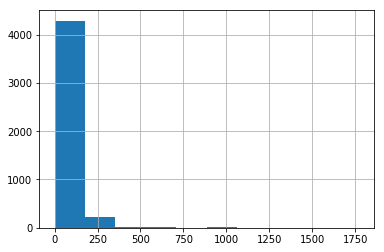

In [65]:
click=dataset.loc[:,'clicks']
click.hist()

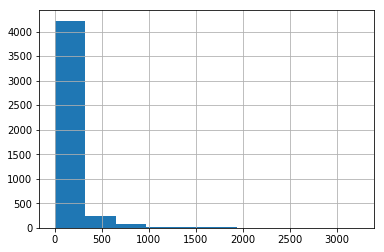

In [66]:
impression=dataset.loc[:,'impressions']
impression.hist()

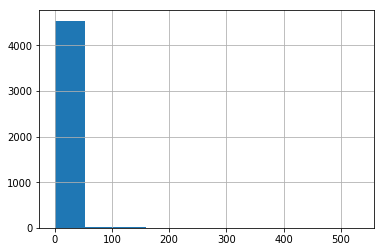

In [67]:
c=dataset.loc[:,'cost']
c.hist()

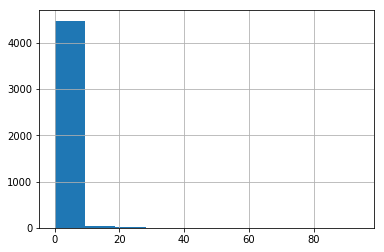

In [68]:
conversion=dataset.loc[:,'conversions']
conversion.hist()

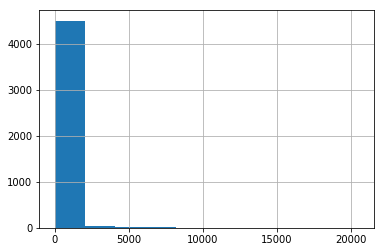

In [69]:
r=dataset.loc[:,'revenue']
r.hist()